<a href="https://colab.research.google.com/github/williamG7/Pokemon-multivariable/blob/main/Pok%C3%A9mon_multivariable_GuzmanWilliam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pokémon multivariable

![Pikachu](https://i.pinimg.com/originals/d0/55/96/d0559662c49b354f89770b376c213e00.gif)

---

# Objectivo

### Modelado Predictivo de Rendimiento Pokémon (OP Score)

A partir del [dataset de Pokémon con métricas de rendimiento](https://raw.githubusercontent.com/raimonizard/datasets/refs/heads/main/pokemon_op_wo_row_id.csv), el objetivo es desarrollar un **modelo de regresión lineal multivariable** capaz de predecir con precisión la columna dependiente **OP Score**.

Para la construcción de este modelo, seleccionaremos un conjunto específico de **variables independientes**, descartando el resto de atributos para optimizar la eficiencia del algoritmo:

* **Total**: Suma base de estadísticas.
* **HP**: Puntos de salud.
* **Attack**: Capacidad de daño físico.
* **Defense**: Resistencia a ataques físicos.
* **Speed**: Agilidad y orden de turno.
* **Generation**: Generación a la que pertenece el Pokémon.

![image.png](https://raw.githubusercontent.com/raimonizard/datasets/refs/heads/main/screenshots/pokemon_op_screenshot1.png)

# Tareas a realizar

### Metodología del Proyecto: Predicción de Rendimiento Pokémon

Para alcanzar nuestro objetivo de predecir el **OP Score**, seguiremos una estructura de trabajo dividida en las siguientes fases técnicas:

#### 1. Análisis Exploratorio de Datos (EDA)
Iniciaremos con una exploración exhaustiva del dataset para auditar la calidad de la información. Esto incluye determinar el volumen de registros, identificar la tipología de las variables, detectar posibles valores nulos y analizar las correlaciones estadísticas entre los atributos base de los Pokémon.

#### 2. Implementación de la Regresión Lineal Multivariable
Desarrollaremos el modelo matemático para modelar la relación entre las **variables independientes** ($X$: *Total, HP, Attack, Defense, Speed, Generation*) y nuestra **variable dependiente** ($y$: *OP Score*).

> **Nota técnica:** Utilizaremos la función `LinearRegression().fit()` para el entrenamiento del algoritmo.



#### 3. Evaluación de la Bondad de Ajuste (Score)
Calcularemos el coeficiente de determinación ($R^2$) del modelo. Este valor es crítico, ya que nos indicará el grado de fidelidad con el que las variables independientes explican la variabilidad del *OP Score*.

#### 4. Análisis de Coeficientes de Impacto
Extraeremos los coeficientes del modelo (`.coef_`) para identificar el peso específico y el impacto de cada atributo físico (como el ataque o la velocidad) dentro de la función polinómica resultante.

#### 5. Validación Predictiva
Ejecutaremos predicciones de prueba sobre el conjunto de datos para verificar la precisión del modelo en escenarios conocidos.

> **Nota técnica:** Utilizaremos `LinearRegression().predict(X)` para estimar el *OP Score* basado en diferentes perfiles de estadísticas.

#### 6. Visualización de Resultados
Generaremos una comparativa visual utilizando `plt.scatter()` para los valores reales y `plt.plot()` para representar la tendencia de la regresión, permitiendo evaluar gráficamente el ajuste del modelo.



#### 7. Simulación de "Pokémon Sintéticos"
Como prueba final de aplicación, diseñaremos **dos nuevos Pokémon** con estadísticas base personalizadas. Utilizaremos el modelo entrenado para calcular su *OP Score* teórico y observar cómo se comportarían según las reglas de rendimiento extraídas.

## Extra

### Estrategia de División y Validación (Train/Test Split)

Para garantizar que nuestro modelo sea capaz de generalizar sus predicciones a nuevos datos y no se limite a "memorizar" el dataset, implementaremos una estrategia de validación cruzada dividiendo la muestra original:

* **80% de los datos (Entrenamiento/Train):** Este subconjunto se utilizará exclusivamente para alimentar el algoritmo y generar el modelo mediante el método `fit`.
* **20% de los datos (Prueba/Test):** Estas filas se reservarán para poner a prueba el modelo. El algoritmo predecirá los valores de la variable independiente basándose en lo aprendido, pero usando datos que no ha visto durante la fase de entrenamiento.

### Entrenamiento y Evaluación de la Precisión

* Desarrollaremos los **modelos de predicción** de la variable objetivo utilizando estrictamente el subconjunto de datos de entrenamiento.
* Calcularemos el **porcentaje de acierto (Accuracy)** del modelo final. Para ello, compararemos las predicciones generadas sobre el bloque de **test** (el 20% restante) con sus valores reales, obteniendo así una métrica objetiva de la fiabilidad de nuestro sistema de inteligencia artificial.

---

![pokémon](https://imagenes.elpais.com/resizer/v2/SMAGZKMKUVK5UPZUPANHV4TYBA.jpg?auth=e508f5a2204a76cc499b98c51702953be896f7133c8c1fe34a5e55ad26ba20be&width=1200)

## 1- importar librerias necesarias

In [1]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 2- Cargar y Explorar los Datos

In [2]:
# Cargar dataset
url = 'https://raw.githubusercontent.com/raimonizard/datasets/refs/heads/main/pokemon_op_wo_row_id.csv'
df = pd.read_csv(url)

print(f"Dataset cargado: {df.shape[0]} pokémon, {df.shape[1]} columnas")

Dataset cargado: 800 pokémon, 14 columnas


In [3]:
# Primeras filas del dataset
print("Primeras 5 filas del dataset:\n")
df.head()

Primeras 5 filas del dataset:



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,OP Score
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,153.20
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,195.80
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,254.80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,303.50
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,148.95


In [4]:
# Información general del dataset
print("Información general del dataset:\n")
df.info()

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   #           800 non-null    int64  
 1   Name        800 non-null    object 
 2   Type 1      800 non-null    object 
 3   Type 2      414 non-null    object 
 4   Total       800 non-null    int64  
 5   HP          800 non-null    int64  
 6   Attack      800 non-null    int64  
 7   Defense     800 non-null    int64  
 8   Sp. Atk     800 non-null    int64  
 9   Sp. Def     800 non-null    int64  
 10  Speed       800 non-null    int64  
 11  Generation  800 non-null    int64  
 12  Legendary   800 non-null    bool   
 13  OP Score    800 non-null    float64
dtypes: bool(1), float64(1), int64(9), object(3)
memory usage: 82.2+ KB


In [5]:
# Verificar valores nulos
print("Valores nulos por columna:\n")
valores_nulos = df.isnull().sum()
print(valores_nulos)
print(f"\nTotal de valores nulos: {valores_nulos.sum()}")

Valores nulos por columna:

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
OP Score        0
dtype: int64

Total de valores nulos: 386


Correlación con OP Score:
OP Score      1.000000
Total         0.996314
Attack        0.766598
HP            0.651895
Defense       0.638800
Speed         0.544113
Generation    0.053191
Name: OP Score, dtype: float64


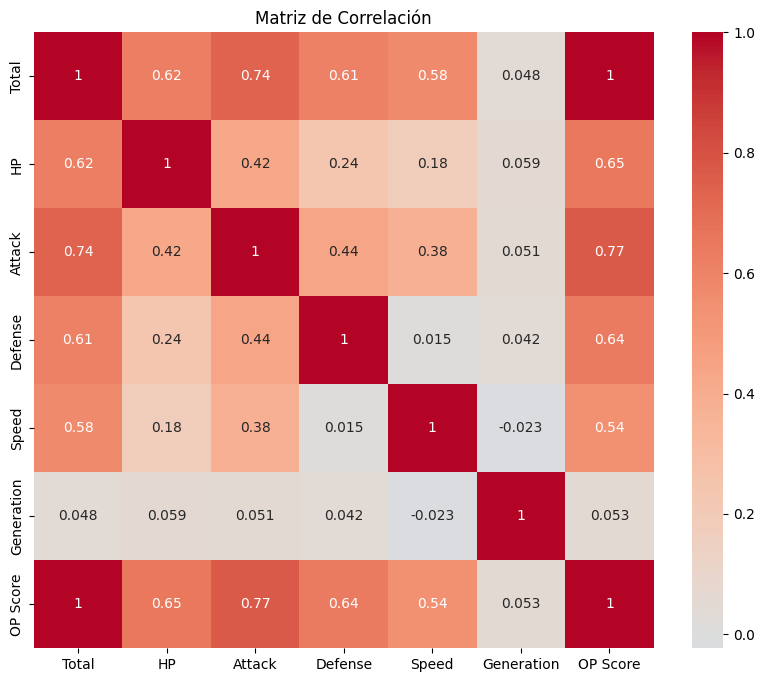

In [6]:
# Correlaciones entre variables
cols = ['Total', 'HP', 'Attack', 'Defense', 'Speed', 'Generation', 'OP Score']
corr = df[cols].corr()

print("Correlación con OP Score:")
print(corr['OP Score'].sort_values(ascending=False))

# Visualizar correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

## 3- Preparar las Variables para el Modelo

### Variables que usaremos:
- **Variables Independientes (X)**: Total, HP, Attack, Defense, Speed, Generation
- **Variable Dependiente (y)**: OP Score

In [7]:
# Seleccionar las columnas que necesitamos
features = ['Total', 'HP', 'Attack', 'Defense', 'Speed', 'Generation']
target = 'OP Score'

# Crear X (variables independientes) y y (variable dependiente)
X = df[features]
y = df[target]

print(f" Variables independientes (X): {list(X.columns)}")
print(f" Variable dependiente (y): {target}")
print(f"\n Shape de X: {X.shape}")
print(f" Shape de y: {y.shape}")

 Variables independientes (X): ['Total', 'HP', 'Attack', 'Defense', 'Speed', 'Generation']
 Variable dependiente (y): OP Score

 Shape de X: (800, 6)
 Shape de y: (800,)


## 4- Crear el Modelo de Regresión Lineal

In [8]:
# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo con todos los datos
modelo.fit(X, y)

print("Modelo listo")
print(f"Intercepto: {modelo.intercept_:.2f}")

Modelo listo
Intercepto: -0.00


## 5- Evaluar el Score del Modelo

### ¿Qué es el R² Score?
- **R² = 1.0**: Perfecto (el modelo predice exactamente)
- **R² = 0.8-0.9**: Muy bueno
- **R² = 0.6-0.8**: Bueno
- **R² < 0.6**: Mejorable

In [9]:
# Ver qué tan bueno es el modelo
r2 = modelo.score(X, y)
print(f"R2: {r2:.4f}")
print(f"El modelo explica el {r2*100:.1f}% de los datos")

if r2 >= 0.9:
    print("Modelo muy bueno")
elif r2 >= 0.7:
    print(" Buen modelo")
else:
    print(" El modelo podría mejorar")

R2: 1.0000
El modelo explica el 100.0% de los datos
Modelo muy bueno


## 6- Analizar los Coeficientes

Coeficientes del modelo:

  Variable  Coeficiente
     Total         0.40
        HP         0.20
   Defense         0.15
    Attack         0.15
     Speed         0.05
Generation         0.05


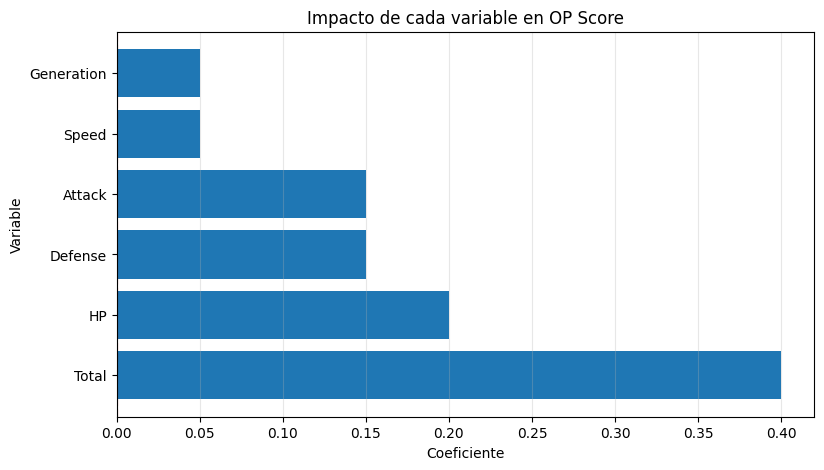


La variable más influyente es: Total


In [10]:
# Ver coeficientes
coefs = pd.DataFrame({
    'Variable': features,
    'Coeficiente': modelo.coef_
})
coefs = coefs.sort_values('Coeficiente', key=abs, ascending=False)

print("Coeficientes del modelo:\n")
print(coefs.to_string(index=False))

# Graficar coeficientes
plt.figure(figsize=(9, 5))
plt.barh(coefs['Variable'], coefs['Coeficiente'])
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Impacto de cada variable en OP Score')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(axis='x', alpha=0.3)
plt.show()

print(f"\nLa variable más influyente es: {coefs.iloc[0]['Variable']}")

## 7- Hacer Predicciones

In [11]:
# Predicciones
y_pred = modelo.predict(X)

# Comparar algunos ejemplos
comparacion = pd.DataFrame({
    'Pokémon': df['Name'],
    'Real': y,
    'Predicho': y_pred,
    'Diferencia': abs(y - y_pred)
})

print("Ejemplos de predicciones:\n")
print(comparacion.sample(10).to_string(index=False))

# Métricas de error
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print(f"\nMétricas de error:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"\nEn promedio las predicciones se desvían ±{mae:.2f} puntos")

Ejemplos de predicciones:

   Pokémon   Real  Predicho   Diferencia
  Medicham 200.40    200.40 5.684342e-14
   Surskit 128.30    128.30 5.684342e-14
    Spewpa 108.25    108.25 5.684342e-14
Kricketune 192.85    192.85 2.842171e-14
    Golurk 244.60    244.60 2.842171e-14
   Slakoth 143.65    143.65 5.684342e-14
 Growlithe 171.30    171.30 5.684342e-14
    Zapdos 281.30    281.30 5.684342e-14
   Leafeon 263.95    263.95 5.684342e-14
Seismitoad 254.05    254.05 5.684342e-14

Métricas de error:
MSE: 0.00
RMSE: 0.00
MAE: 0.00

En promedio las predicciones se desvían ±0.00 puntos


## 8- Visualizar los Resultados

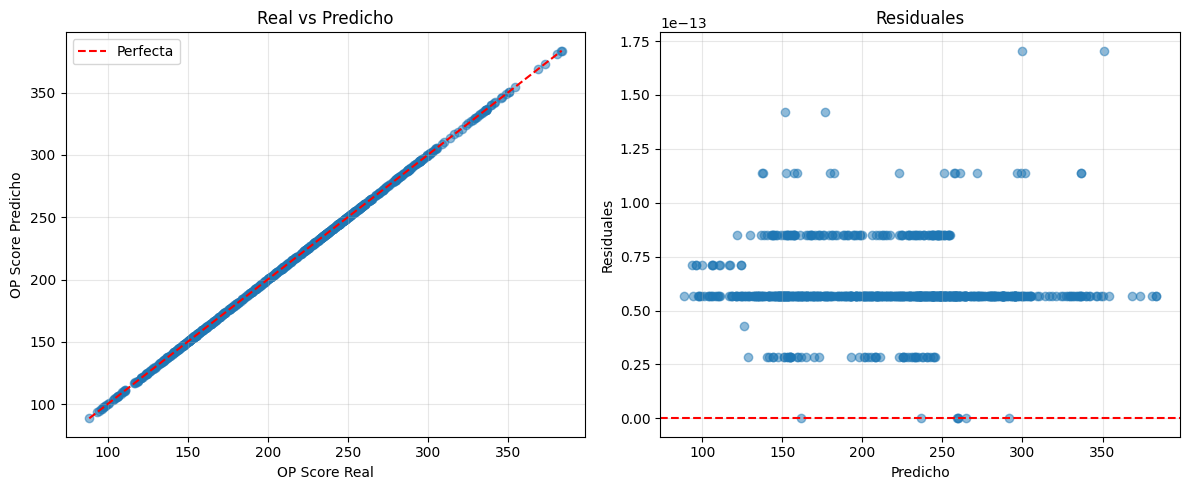

In [12]:
# Gráficos de evaluación
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Real vs Predicho
axes[0].scatter(y, y_pred, alpha=0.5)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfecta')
axes[0].set_xlabel('OP Score Real')
axes[0].set_ylabel('OP Score Predicho')
axes[0].set_title('Real vs Predicho')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residuales
residuales = y - y_pred
axes[1].scatter(y_pred, residuales, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicho')
axes[1].set_ylabel('Residuales')
axes[1].set_title('Residuales')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

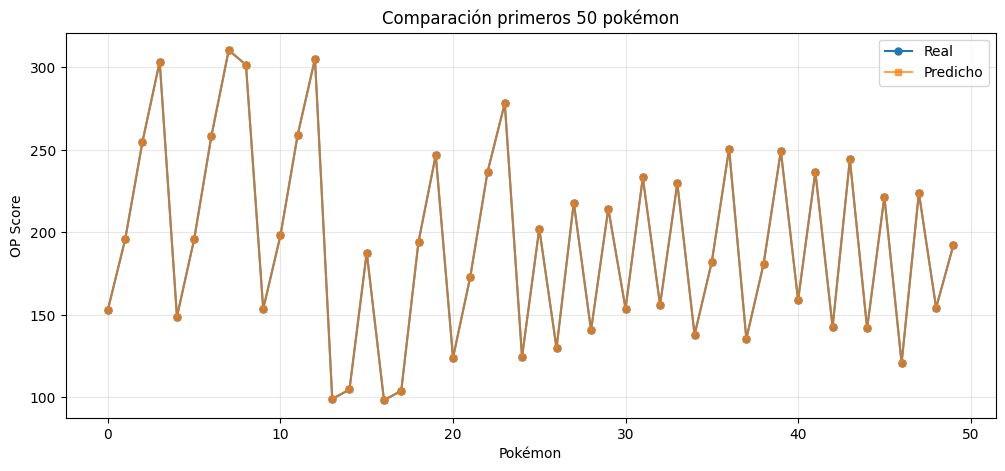

In [13]:
# Comparar primeros 50 pokémon
n = 50
plt.figure(figsize=(12, 5))
plt.plot(range(n), y[:n].values, 'o-', label='Real', markersize=5)
plt.plot(range(n), y_pred[:n], 's-', label='Predicho', markersize=5, alpha=0.7)
plt.xlabel('Pokémon')
plt.ylabel('OP Score')
plt.title(f'Comparación primeros {n} pokémon')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 9- Crear Pokémon Nuevos

In [14]:
# Crear 2 pokémon de prueba
nuevos = pd.DataFrame({
    'Nombre': ['Pikachu ', 'Charizard '],
    'Total': [520, 680],
    'HP': [85, 110],
    'Attack': [120, 150],
    'Defense': [70, 95],
    'Speed': [140, 85],
    'Generation': [8, 9]
})

print("Pokémon nuevos:\n")
print(nuevos.to_string(index=False))

# Predecir OP Score
X_nuevos = nuevos[features]
predicciones = modelo.predict(X_nuevos)

print("\nOP Score predicho:")
for i, nombre in enumerate(nuevos['Nombre']):
    print(f"{nombre}: {predicciones[i]:.2f}")

# Agregar predicción al dataframe
nuevos['OP_Score'] = predicciones
print("\nResumen completo:")
print(nuevos.to_string(index=False))

Pokémon nuevos:

    Nombre  Total  HP  Attack  Defense  Speed  Generation
  Pikachu     520  85     120       70    140           8
Charizard     680 110     150       95     85           9

OP Score predicho:
Pikachu : 260.90
Charizard : 335.45

Resumen completo:
    Nombre  Total  HP  Attack  Defense  Speed  Generation  OP_Score
  Pikachu     520  85     120       70    140           8    260.90
Charizard     680 110     150       95     85           9    335.45


## Extra

In [15]:
# Dividir datos en train y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train: {len(X_train)} pokémon ({len(X_train)/len(X)*100:.0f}%)")
print(f"Test: {len(X_test)} pokémon ({len(X_test)/len(X)*100:.0f}%)")

Train: 640 pokémon (80%)
Test: 160 pokémon (20%)


In [16]:
# Entrenar con datos de train
modelo2 = LinearRegression()
modelo2.fit(X_train, y_train)

# Evaluar en ambos conjuntos
y_train_pred = modelo2.predict(X_train)
y_test_pred = modelo2.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Resultados:")
print(f"\nTrain - R²: {r2_train:.4f}, MAE: {mae_train:.2f}")
print(f"Test  - R²: {r2_test:.4f}, MAE: {mae_test:.2f}")

# Verificar overfitting
diff = abs(r2_train - r2_test)
print(f"\nDiferencia R²: {diff:.4f}")
if diff < 0.05:
    print("No hay overfitting significativo")
else:
    print("Posible overfitting")

# Accuracy con margen de error
margen = 5
correctas = sum(abs(y_test - y_test_pred) <= margen)
acc = (correctas / len(y_test)) * 100
print(f"\nAccuracy (error ≤{margen}): {acc:.1f}%")

Resultados:

Train - R²: 1.0000, MAE: 0.00
Test  - R²: 1.0000, MAE: 0.00

Diferencia R²: 0.0000
No hay overfitting significativo

Accuracy (error ≤5): 100.0%


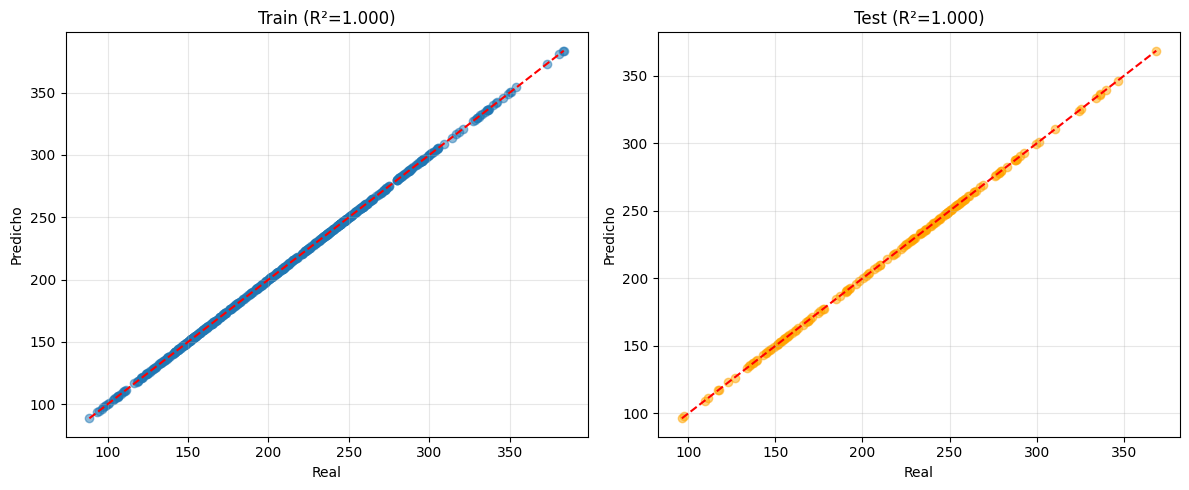

In [17]:
# Comparar train y test
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train
axes[0].scatter(y_train, y_train_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
axes[0].set_xlabel('Real')
axes[0].set_ylabel('Predicho')
axes[0].set_title(f'Train (R²={r2_train:.3f})')
axes[0].grid(alpha=0.3)

# Test
axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_xlabel('Real')
axes[1].set_ylabel('Predicho')
axes[1].set_title(f'Test (R²={r2_test:.3f})')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()